### Neural Network

In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras import models
from keras import layers

from keras.utils import to_categorical
import numpy as np

In [2]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

In [3]:
# Load the data
(train_images, train_labels),(test_images, test_labels) = mnist.load_data()

# 1- reshape the images
# Train images [60000, 28, 28] 3 dimensions  -> [60000, 28*28] -> 2 Dim
train_images = train_images.reshape((60000, 28 * 28)) # or (60000, 784)
test_images = test_images.reshape((10000, 28 * 28))   # or (10000, 784)

print(train_images.ndim)

#2- Normalise the images
train_images = train_images / 255

test_images = test_images / 255

# create categorical Labels
train_labels = to_categorical(train_labels)

# Build the Network
network = models.Sequential(name = 'My_MNIST_Model')
# Input layer + the 1st Hidden Layer
network.add(layers.Dense(128, activation = 'relu', input_shape = (28 * 28,), name = '1st_Hidden_layer'))
network.add(layers.Dense(128, activation = 'relu', name = '2nd_Hidden_layer'))

# Output Layer with 10x Classes
network.add(layers.Dense(10, activation = 'softmax', name = 'Output_layer'))

network.summary()

2


Model: "My_MNIST_Model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ 1st_Hidden_layer (Dense)        │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ 2nd_Hidden_layer (Dense)        │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_layer (Dense)            │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 118,282 (462.04 KB)

 Trainable params: 118,282 (462.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
# Compile the model
network.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])

# Train the model
history = network.fit(train_images, train_labels, epochs = 10, batch_size = 128, shuffle = True, validation_split = 0.1)

# Evaluate the network
test_labels2 = to_categorical(test_labels) 

# Evaluate the test images
result = network.evaluate(test_images, test_labels2, batch_size = 128)
print('Test_Loss, Test_Acc', result)

Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8234 - loss: 0.6229 - val_accuracy: 0.9662 - val_loss: 0.1256
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9588 - loss: 0.1384 - val_accuracy: 0.9725 - val_loss: 0.1018
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9724 - loss: 0.0949 - val_accuracy: 0.9708 - val_loss: 0.1004
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9781 - loss: 0.0724 - val_accuracy: 0.9760 - val_loss: 0.0895
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9831 - loss: 0.0540 - val_accuracy: 0.9780 - val_loss: 0.0767
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9881 - loss: 0.0395 - val_accuracy: 0.9792 - val_loss: 0.0755
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9891 - loss: 0.0339 - val_accuracy: 0.9787 - val_loss: 0.0793
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9916 - loss: 0.0269 - val_accuracy: 0.

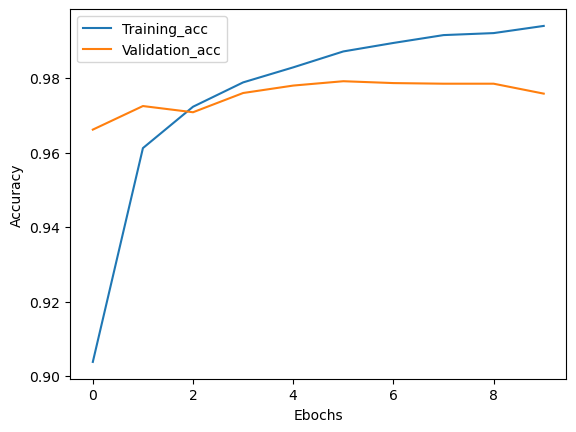

In [6]:
import matplotlib.pyplot as plt

plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Ebochs")
plt.ylabel("Accuracy")
plt.legend(["Training_acc", "Validation_acc"])
plt.show()

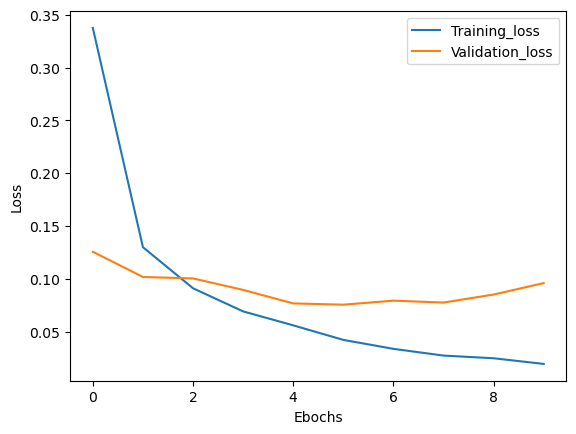

In [7]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Ebochs")
plt.ylabel("Loss")
plt.legend(["Training_loss", "Validation_loss"])
plt.show()

### Decision Tree

In [8]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [9]:
### Decision tree

# Load the data
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

# Reshape to two dimensions
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

print(train_data_flat.shape)
print(test_data_flat.shape)

(60000, 784)
(10000, 784)


In [10]:
tree = DecisionTreeRegressor()
tree.fit(train_data_flat, train_targets)
y_pred_tree = tree.predict(test_data_flat)
mse_dt = mean_squared_error(test_targets, y_pred_tree)
mae_dt = mean_absolute_error(test_targets, y_pred_tree)
print('Mean squared error using decision tree: ', mse_dt)
print('Mean absolute error using decision tree: ', mae_dt)

Mean squared error using decision tree:  2.1521
Mean absolute error using decision tree:  0.4829


### Random Forest

In [11]:
from sklearn.ensemble import RandomForestRegressor

In [12]:
# Random forest

# Load the data
(train_data, train_targets), (test_data, test_targets) = mnist.load_data()

# Reshape to two dimensions
train_data_flat = train_data.reshape(train_data.shape[0], -1)
test_data_flat = test_data.reshape(test_data.shape[0], -1)

# Increase number of tress and see the effect

model = RandomForestRegressor(n_estimators = 50, random_state = 30)
model.fit(train_data_flat, train_targets)

y_pred_RF = model.predict(test_data_flat)

mse_RF = mean_squared_error(test_targets, y_pred_RF)
mae_RF = mean_absolute_error(test_targets, y_pred_RF)
print('Mean squared error using Random Forest: ', mse_RF)
print('Mean absolute error Using Random Forest: ', mae_RF)